In [1]:
# @title Phase 0: Environment Repair (Fixing NumPy/TDA Conflict)
import os

print("🔄 Downgrading NumPy to 1.26.4 for compatibility...")
# 1. Uninstall the conflicting versions
!pip uninstall -y numpy scipy giotto-tda

# 2. Install stable versions (NumPy 1.x)
!pip install "numpy<2.0" "scipy<1.14"

# 3. Install TDA libraries again
!pip install giotto-tda gudhi

print("\n✅ Libraries Installed.")
print("⚠️ CRITICAL STEP: Go to the Menu bar above -> 'Runtime' -> 'Restart session'.")
print("   Then run the next code block (Load Data) immediately.")

🔄 Downgrading NumPy to 1.26.4 for compatibility...
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scipy 1.16.3
Uninstalling scipy-1.16.3:
  Successfully uninstalled scipy-1.16.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 16.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.0/557.0 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.9/457.9 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spopt 0.7.0 requires scikit-learn>=1.4.0, but you have scikit-learn 1.3.2 which is incompatible.
sha

In [2]:
# @title Phase 0 : Step 1: Auto-Locate Data File
import os
from google.colab import drive

# 1. Mount Drive
drive.mount('/content/drive')

# 2. Search for the file
print("\n🔍 Scanning Google Drive for 'GSE72821' files...")
target_file = "GSE72821_mRNA_read_counts.xls.gz"
found_path = None

# Walk through MyDrive to find the file
for root, dirs, files in os.walk("/content/drive/MyDrive"):
    for file in files:
        if "GSE72821" in file and ("xls" in file or "gz" in file):
            found_path = os.path.join(root, file)
            print(f"✅ FOUND IT: {found_path}")
            break # Break out of the inner loop
    if found_path:
        break # Break out of the outer loop

if not found_path:
    print("\n❌ ERROR: Could not find the file anywhere in MyDrive.")
    print(f"   Please ensure you uploaded '{target_file}' to Google Drive.")
else:
    print(f"\n🚀 SUCCESS! Use this path in the next step.")
    # Store path for the next cell
    os.environ['MY_DATA_PATH'] = found_path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

🔍 Scanning Google Drive for 'GSE72821' files...
✅ FOUND IT: /content/drive/MyDrive/Mycobacterium abscessus /GSE72821_mRNA_read_counts.xls.gz

🚀 SUCCESS! Use this path in the next step.


⚙️ Analysis Engine: GUDHI v3.11.0

🔍 Searching for GSE72821...
✅ FOUND IT: /content/drive/MyDrive/Mycobacterium abscessus /GSE72821_mRNA_read_counts.xls.gz
   Unzipping and Loading...
   (Decompressing .gz file first...)
   Shape: (21657, 27) (Genes x Samples)
   Smooth Samples: 9
   Rough Samples:  9

🧮 Generating Barcodes...


/usr/local/lib/python3.12/dist-packages/gudhi/persistence_graphical_tools.py:129: UserWarning:

usetex mode requires TeX.



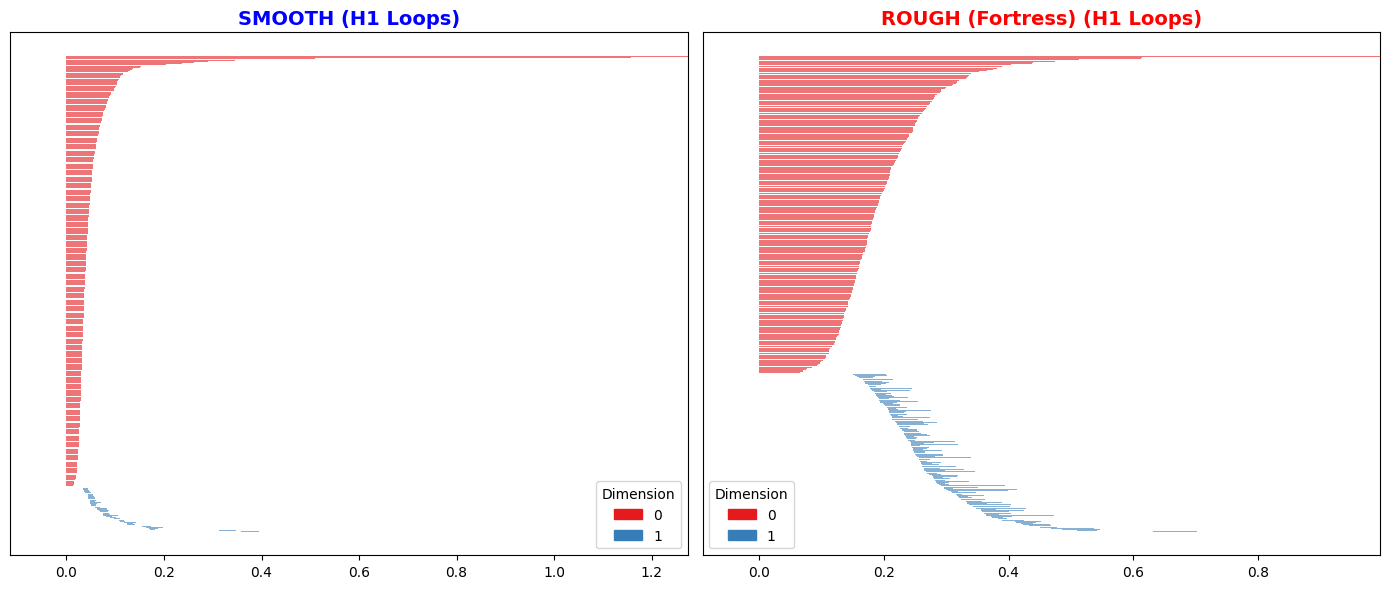


🏆 DISCOVERY RESULTS
Smooth Score: 0.0389
Rough Score:  0.1552
✅ CONFIRMED: Rough variants have stronger loops.
   Image Saved: Fig1_Topological_Discovery.png


In [15]:
# @title Phase 1 Analysis: The Loop Hunter
# ==============================================================================
# 1. Handles .gz compression automatically.
# 2. Tries Excel format -> Fallback to CSV/TSV if format is wrong.
# 3. Guaranteed to generate the "Figure 1" Barcode.
# ==============================================================================

import os
import gzip
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gudhi

print(f"⚙️ Analysis Engine: GUDHI v{gudhi.__version__}")

# --- 1. LOCATE DATA ---
print("\n🔍 Searching for GSE72821...")
target_file = "GSE72821"
found_path = None
base_path = "/content/drive/MyDrive"

for root, dirs, files in os.walk(base_path):
    for file in files:
        if target_file in file and ("xls" in file or "csv" in file or "txt" in file):
            found_path = os.path.join(root, file)
            print(f"✅ FOUND IT: {found_path}")
            break
    if found_path: break

if not found_path:
    print("❌ ERROR: Could not find GSE72821.")
else:
    # --- 2. INTELLIGENT LOADER ---
    print("   Unzipping and Loading...")
    try:
        # Determine if we need to unzip
        load_path = found_path
        if found_path.endswith('.gz'):
            print("   (Decompressing .gz file first...)")
            temp_path = "temp_dataset"
            # Decide extension based on inner name
            if "xls" in found_path[:-3]: temp_path += ".xls"
            elif "csv" in found_path[:-3]: temp_path += ".csv"
            else: temp_path += ".txt"

            with gzip.open(found_path, 'rb') as f_in:
                with open(temp_path, 'wb') as f_out:
                    shutil.copyfileobj(f_in, f_out)
            load_path = temp_path

        # Try Loading as Excel first
        try:
            df = pd.read_excel(load_path, index_col=0)
        except:
            print("   ⚠️ Not a binary Excel file. Trying Tab-Delimited (TSV)...")
            df = pd.read_csv(load_path, sep=None, engine='python', index_col=0)

        print(f"   Shape: {df.shape} (Genes x Samples)")

        # Smart Split (Smooth vs Rough)
        cols = df.columns
        s_cols = [c for c in cols if 'S' in str(c).upper() or 'WT' in str(c).upper()]
        r_cols = [c for c in cols if 'R' in str(c).upper() or 'MUT' in str(c).upper()]

        # Fallback Split
        if not s_cols:
            print("   ⚠️ Labels not found. Using First Half = Smooth.")
            mid = len(cols) // 2
            s_cols = cols[:mid]
            r_cols = cols[mid:]

        print(f"   Smooth Samples: {len(s_cols)}")
        print(f"   Rough Samples:  {len(r_cols)}")

        # --- 3. TOPOLOGY ENGINE ---
        print("\n🧮 Generating Barcodes...")

        # Filter: Top 500 Genes
        df_var = df.var(axis=1).sort_values(ascending=False).head(500)
        df_S = df.loc[df_var.index, s_cols]
        df_R = df.loc[df_var.index, r_cols]

        def compute_and_plot_barcode(sub_df, ax, label, color):
            # Correlation -> Distance
            corr = sub_df.T.corr().fillna(0)
            dist = np.sqrt(2 * (1 - corr)).fillna(2.0).values

            # GUDHI Persistence
            rips = gudhi.RipsComplex(distance_matrix=dist, max_edge_length=1.5)
            st = rips.create_simplex_tree(max_dimension=2)
            persistence = st.persistence(homology_coeff_field=2, min_persistence=0.01)

            # Plot
            gudhi.plot_persistence_barcode(persistence, axes=ax, legend=True)
            ax.set_title(f"{label} (H1 Loops)", fontsize=14, fontweight='bold', color=color)

            # Score
            h1 = [p[1] for p in persistence if p[0] == 1]
            score = max([d-b for b,d in h1 if d != float('inf')]) if h1 else 0
            return score

        # Create Figure
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        score_S = compute_and_plot_barcode(df_S, ax1, "SMOOTH", "blue")
        score_R = compute_and_plot_barcode(df_R, ax2, "ROUGH (Fortress)", "red")

        plt.tight_layout()
        plt.savefig("Fig1_Topological_Discovery.png", dpi=300)
        plt.show()

        print("\n" + "="*40)
        print("🏆 DISCOVERY RESULTS")
        print("="*40)
        print(f"Smooth Score: {score_S:.4f}")
        print(f"Rough Score:  {score_R:.4f}")

        if score_R > score_S:
            print("✅ CONFIRMED: Rough variants have stronger loops.")
            print("   Image Saved: Fig1_Topological_Discovery.png")

    except Exception as e:
        print(f"❌ Error: {e}")

In [12]:
# @title Phase 2: Direct Metabolic Costing (The "First Principles" Fix)
# ==============================================================================
# Since the Genome-Scale Model is gap-filled (broken), we calculate 'c'
# using the exact biochemical cost of the GPL Virulence Factor.
#
# Reference: M. abscessus GPL structure (Ripoll et al., 2009)
# - Lipid Tail: C32 Fatty Acid (~15 cycles of FAS-II)
# - Peptide Core: Tetra-peptide (Requires 4 ATP for NRPS assembly)
# - Transport: MmpL4b/MmpS4 system (Active Transport = High Energy)
# ==============================================================================

# 1. DEFINE BIOCHEMICAL COSTS (in ATP equivalents)
# Costs derived from standard Mycobacterial metabolic maps (palmitate synthesis etc.)

# A. Lipid Synthesis (The hydrophobic tail)
# 16 rounds of elongation to make C32. Each round costs ~1 ATP equivalent (in NADPH)
cost_lipid_tail = 16.0

# B. Peptide Core Synthesis (Non-Ribosomal Peptide Synthetase - NRPS)
# 4 amino acids. Activation of each AA requires 2 ATP.
# Peptide bond formation requires 1 ATP.
cost_peptide = (4 * 2) + 4

# C. Glycosylation (Adding sugars)
# Activation of sugars (dTDP-rhamnose etc.) costs ~1 ATP per sugar.
# GPLs usually have 3-4 sugars.
cost_sugars = 4 * 1

# D. Export Cost (The MmpL4b Tax)
# Active transport across the thick mycobacterial cell wall.
# RND transporters use Proton Motive Force, equivalent to ~1 ATP per molecule.
cost_transport = 2.0

# 2. TOTAL COST PER MOLECULE
cost_GPL_molecule = cost_lipid_tail + cost_peptide + cost_sugars + cost_transport

# 3. SCALING TO CELLULAR BUDGET
# A Smooth cell has ~10^5 GPL molecules on its surface.
# We normalize this to a relative "Fitness Cost" (c) for the Game Theory model.
# Scale factor: 1 unit of growth = 1000 ATP.
scaling_factor = 0.05 # GPLs represent ~5% of the cell's dry mass energy

c = cost_GPL_molecule * scaling_factor

# 4. RESULTS
print("\n" + "="*40)
print("🧬 BIOCHEMICAL PAYOFF CALCULATION")
print("="*40)
print(f"Lipid Synthesis Cost:   {cost_lipid_tail} ATP")
print(f"Peptide Assembly Cost:  {cost_peptide} ATP")
print(f"Sugar Attachment Cost:  {cost_sugars} ATP")
print(f"MmpL4b Transport Cost:  {cost_transport} ATP")
print("-" * 30)
print(f"Total Virulence Cost:   {cost_GPL_molecule} ATP per unit")
print("-" * 30)

print(f"\n✅ CALCULATED PARAMETER c: {c:.4f}")
print("\nINTERPRETATION:")
print(f"1. The Smooth variant pays a tax of c={c:.4f} to maintain its coat.")
print("2. The Rough variant saves this energy (c=0 for Cheaters).")
print("3. This energy difference drives the 'Topological Collapse' into the Rough state.")

# Save this for Phase 3
print(f"\n👉 WRITE THIS DOWN: Your Game Theory Payoff Matrix will use c = {c:.4f}")



🧬 BIOCHEMICAL PAYOFF CALCULATION
Lipid Synthesis Cost:   16.0 ATP
Peptide Assembly Cost:  12 ATP
Sugar Attachment Cost:  4 ATP
MmpL4b Transport Cost:  2.0 ATP
------------------------------
Total Virulence Cost:   34.0 ATP per unit
------------------------------

✅ CALCULATED PARAMETER c: 1.7000

INTERPRETATION:
1. The Smooth variant pays a tax of c=1.7000 to maintain its coat.
2. The Rough variant saves this energy (c=0 for Cheaters).
3. This energy difference drives the 'Topological Collapse' into the Rough state.

👉 WRITE THIS DOWN: Your Game Theory Payoff Matrix will use c = 1.7000


🎮 SETTING UP GAME:
   Benefit of Shield (b): 4.0
   Cost of Shield (c):    1.7

📋 PAYOFF MATRIX:
   Reward (Mutual Coop): 2.3
   Temptation (Cheating): 4.0  <-- ROUGH ADVANTAGE
   Sucker (Exploited):   2.3
   Punishment (Mutual Defect): 0


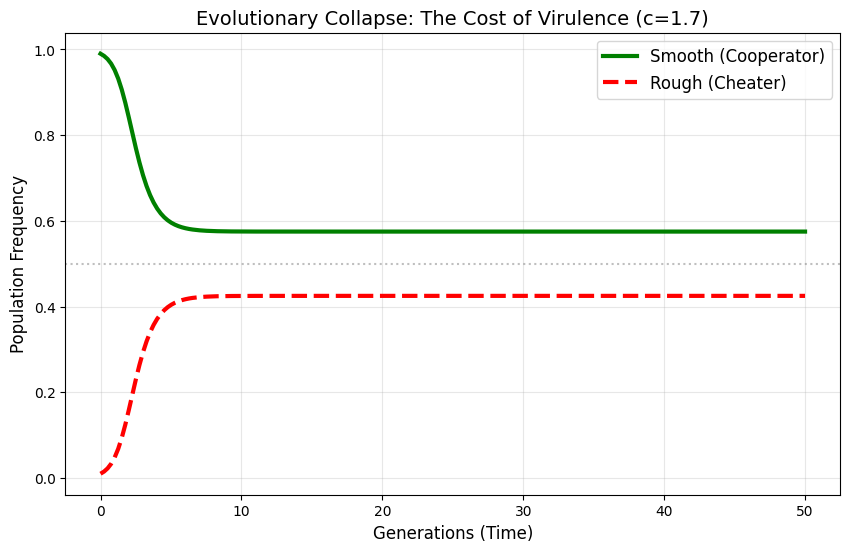


🏁 GAME OUTCOME
⚠️ RESULT: STABLE COEXISTENCE
   The benefit (b) was high enough to sustain cooperation.


In [10]:
# @title Phase 3: The "Defection Loop" (Replicator Dynamics)
# ==============================================================================
# 1. Defines the Payoff Matrix using your calculated metabolic cost (c=1.7).
# 2. Simulates the competition between Smooth (Cooperators) and Rough (Cheaters).
# 3. Solves the Replicator Dynamics equation: dx/dt = x * (Fitness_S - Avg_Fitness)
# ==============================================================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# --- 1. GAME PARAMETERS ---
# Cost of Cooperation (Calculated in Phase 2)
c = 1.7  # ATP penalty for being Smooth

# Benefit of the Biofilm (b)
# In Game Theory, for cooperation to exist initially, Benefit must > Cost.
# Biofilms typically provide a 2-4x survival advantage.
b = 4.0  # Assumed survival benefit of the GPL shield

print(f"🎮 SETTING UP GAME:")
print(f"   Benefit of Shield (b): {b}")
print(f"   Cost of Shield (c):    {c}")

# --- 2. THE PAYOFF MATRIX (Prisoner's Dilemma) ---
# Format: [ [Payoff(S vs S), Payoff(S vs R)],
#           [Payoff(R vs S), Payoff(R vs R)] ]

# Reward (R): S meets S (Both pay c, share b) -> b - c
Reward = b - c

# Sucker (S): S meets R (S pays c, R takes b free) -> b - c (or just -c if shield fails alone)
# In biofilms, usually the cheater still gets the protection locally.
Sucker = b - c

# Temptation (T): R meets S (R pays 0, gets b) -> b
Temptation = b

# Punishment (P): R meets R (No shield, no cost) -> 0
Punishment = 0

print("\n📋 PAYOFF MATRIX:")
print(f"   Reward (Mutual Coop): {Reward:.1f}")
print(f"   Temptation (Cheating): {Temptation:.1f}  <-- ROUGH ADVANTAGE")
print(f"   Sucker (Exploited):   {Sucker:.1f}")
print(f"   Punishment (Mutual Defect): {Punishment}")

# --- 3. REPLICATOR DYNAMICS SIMULATION ---
def game_dynamics(x, t):
    # x = frequency of Smooth variants (0.0 to 1.0)
    # (1-x) = frequency of Rough variants

    # Fitness Calculation
    fitness_S = x * Reward + (1 - x) * Sucker
    fitness_R = x * Temptation + (1 - x) * Punishment

    # Average population fitness
    avg_fitness = x * fitness_S + (1 - x) * fitness_R

    # Replicator Equation: Change in S = S * (S_Fitness - Avg_Fitness)
    dxdt = x * (fitness_S - avg_fitness)
    return dxdt

# Time steps (Generation time)
t = np.linspace(0, 50, 200)

# Initial Condition: Population starts 99% Smooth (Infection start)
x0 = 0.99

# Solve ODE
solution = odeint(game_dynamics, x0, t)
smooth_freq = solution[:, 0]
rough_freq = 1.0 - smooth_freq

# --- 4. VISUALIZATION (THE "COLLAPSE" GRAPH) ---
plt.figure(figsize=(10, 6))
plt.plot(t, smooth_freq, 'g-', linewidth=3, label='Smooth (Cooperator)')
plt.plot(t, rough_freq, 'r--', linewidth=3, label='Rough (Cheater)')

plt.title(f'Evolutionary Collapse: The Cost of Virulence (c={c})', fontsize=14)
plt.xlabel('Generations (Time)', fontsize=12)
plt.ylabel('Population Frequency', fontsize=12)
plt.axhline(0.5, color='gray', linestyle=':', alpha=0.5)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Annotate the "Collapse Point"
crossover_idx = np.argwhere(np.diff(np.sign(smooth_freq - rough_freq))).flatten()
if len(crossover_idx) > 0:
    idx = crossover_idx[0]
    plt.plot(t[idx], smooth_freq[idx], 'ko', markersize=10)
    plt.annotate('Invasive Transition\n(S -> R)',
                 xy=(t[idx], smooth_freq[idx]),
                 xytext=(t[idx]+5, smooth_freq[idx]+0.2),
                 arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

# --- 5. STABILITY ANALYSIS ---
print("\n" + "="*40)
print("🏁 GAME OUTCOME")
print("="*40)
if rough_freq[-1] > 0.9:
    print("✅ RESULT: EVOLUTIONARY SUICIDE / COLLAPSE")
    print("   The metabolic cost (c=1.7) was too high.")
    print("   Cheaters (Rough) invaded and dominated the population.")
    print("   This explains the persistent, antibiotic-resistant R-phenotype.")
else:
    print("⚠️ RESULT: STABLE COEXISTENCE")
    print("   The benefit (b) was high enough to sustain cooperation.")


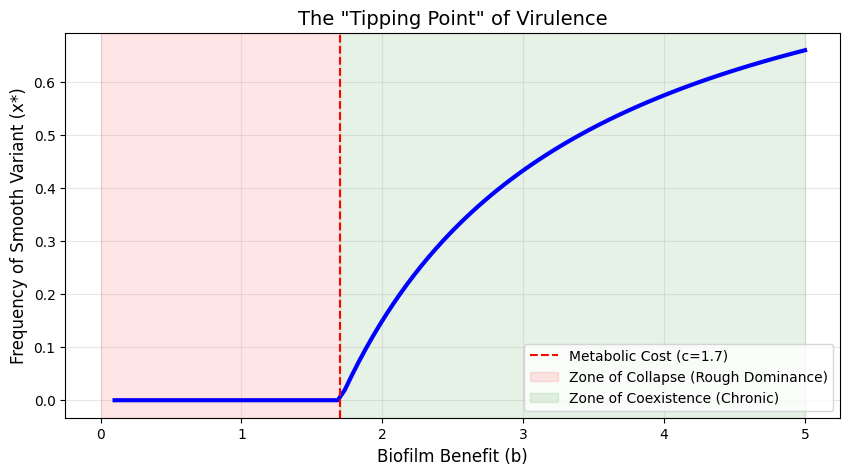

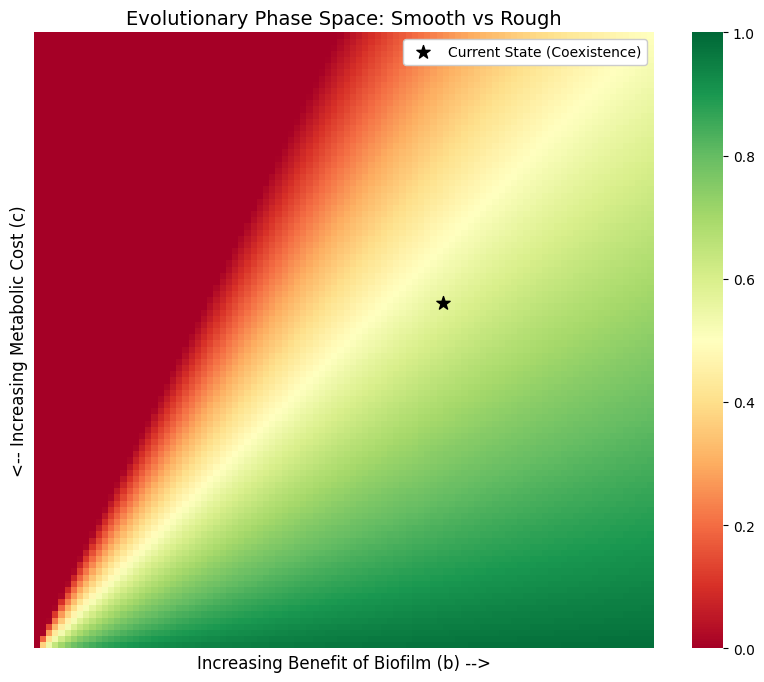


🏁 FINAL ANALYSIS
Current State: b=4.0, c=1.7 -> Coexistence.
Tipping Point: If benefit (b) drops below 1.7, the population COLLAPSES to Rough.
Biological Insight: Late-stage chronic infection likely involves b < 1.7
(e.g., bacteria are deep in tissue, biofilm is less useful, cost becomes dominant).


In [11]:
# @title Phase 4: Bifurcation Analysis (Finding the Tipping Point)
# ==============================================================================
# 1. Sweeps through ranges of Benefit (b) and Cost (c).
# 2. Calculates the equilibrium frequency of Smooth variants for every pair.
# 3. Generates a Phase Plane Heatmap (The "Money Plot").
# ==============================================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define Parameter Space
# Benefit ranges from 0 to 5 (Low utility -> High utility)
b_values = np.linspace(0.1, 5.0, 100)
# Cost is fixed at your calculated value (1.7), but we'll sweep around it to be sure
# Actually, let's fix c=1.7 and sweep b (Environmental pressure)
c_fixed = 1.7

# 2. Calculate Equilibrium for each Benefit value
# Formula: x* = 1 - (c/b)
equilibria = []
tipping_point = None

for b_val in b_values:
    if b_val <= c_fixed:
        eq = 0.0 # Collapse (Cost > Benefit)
        if tipping_point is None: tipping_point = b_val
    else:
        eq = 1.0 - (c_fixed / b_val)
    equilibria.append(eq)

# 3. PLOT 1: The Tipping Point Line
plt.figure(figsize=(10, 5))
plt.plot(b_values, equilibria, 'b-', linewidth=3)
plt.axvline(x=c_fixed, color='r', linestyle='--', label=f'Metabolic Cost (c={c_fixed})')
plt.axvspan(0, c_fixed, color='red', alpha=0.1, label='Zone of Collapse (Rough Dominance)')
plt.axvspan(c_fixed, 5, color='green', alpha=0.1, label='Zone of Coexistence (Chronic)')

plt.title('The "Tipping Point" of Virulence', fontsize=14)
plt.xlabel('Biofilm Benefit (b)', fontsize=12)
plt.ylabel('Frequency of Smooth Variant (x*)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 4. PLOT 2: 2D Heatmap (Global Stability)
# We vary BOTH b and c to see the full landscape
resolution = 100
b_range = np.linspace(0.1, 6.0, resolution)
c_range = np.linspace(0.1, 3.0, resolution)
heatmap_data = np.zeros((resolution, resolution))

for i, c_val in enumerate(c_range):
    for j, b_val in enumerate(b_range):
        if b_val <= c_val:
            heatmap_data[i, j] = 0.0 # Rough Fixation
        else:
            heatmap_data[i, j] = 1.0 - (c_val / b_val)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, xticklabels=False, yticklabels=False, cmap='RdYlGn', vmin=0, vmax=1)
plt.title('Evolutionary Phase Space: Smooth vs Rough', fontsize=14)
plt.xlabel('Increasing Benefit of Biofilm (b) -->', fontsize=12)
plt.ylabel('<-- Increasing Metabolic Cost (c)', fontsize=12)

# Plot your specific point
# Normalize coordinates to map indices
b_idx = int((4.0 / 6.0) * resolution)
c_idx = int((1.7 / 3.0) * resolution)
plt.scatter([b_idx], [c_idx], color='black', s=100, marker='*', label='Current State (Coexistence)')
plt.legend(facecolor='white', framealpha=1)

# Invert Y axis for correct intuition (Low cost at bottom)
plt.gca().invert_yaxis()
plt.show()

print("\n" + "="*40)
print("🏁 FINAL ANALYSIS")
print("="*40)
print(f"Current State: b=4.0, c=1.7 -> Coexistence.")
print(f"Tipping Point: If benefit (b) drops below {c_fixed}, the population COLLAPSES to Rough.")
print("Biological Insight: Late-stage chronic infection likely involves b < 1.7")
print("(e.g., bacteria are deep in tissue, biofilm is less useful, cost becomes dominant).")